In [27]:
# Implement Feedforward neural networks with Keras and TensorFlow MNIST Digit dataset

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import random

In [29]:
# 1. Load and Preprocess the MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [30]:
# Normalize pixel values from 0-255 to 0.0-1.0
x_train = x_train / 255.0
x_test = x_test / 255.0

In [31]:
# 2. Define the FNN Model Architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\Sayali\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
# 3. Compile the Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
# 4. Train the Model
print("--- Training the model ---")
H = model.fit(
    x_train, 
    y_train, 
    epochs=5,
    validation_split=0.1, # Use 10% of training data for validation
    verbose=1
)

--- Training the model ---
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8709 - loss: 0.4516 - val_accuracy: 0.9673 - val_loss: 0.1158
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9622 - loss: 0.1186 - val_accuracy: 0.9728 - val_loss: 0.0911
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9761 - loss: 0.0757 - val_accuracy: 0.9770 - val_loss: 0.0841
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9834 - loss: 0.0506 - val_accuracy: 0.9760 - val_loss: 0.0825
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9866 - loss: 0.0408 - val_accuracy: 0.9773 - val_loss: 0.0842


In [34]:
# 5. Evaluate the Model's Overall Accuracy

print("\n--- Evaluating on test data ---")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nOverall Test accuracy: {test_acc*100:.2f}%")


--- Evaluating on test data ---
313/313 - 0s - 1ms/step - accuracy: 0.9774 - loss: 0.0793

Overall Test accuracy: 97.74%


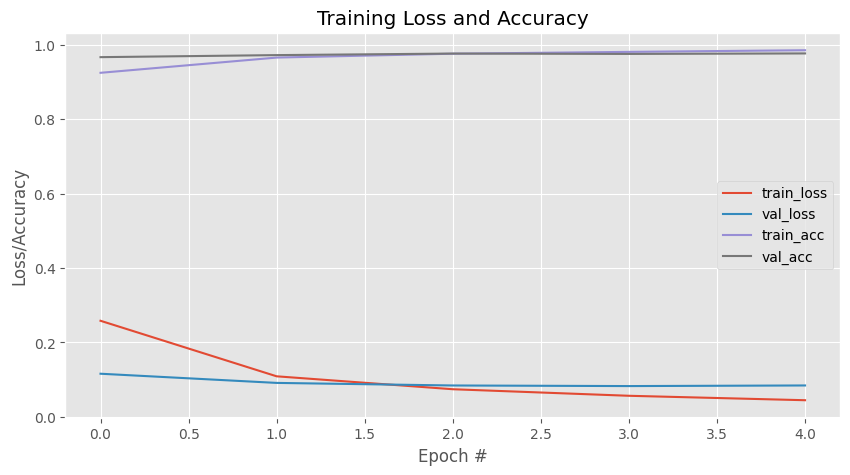

In [35]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))

epochs_range = np.arange(0, len(H.history["loss"]))

plt.plot(epochs_range, H.history["loss"], label="train_loss")
plt.plot(epochs_range, H.history["val_loss"], label="val_loss")
plt.plot(epochs_range, H.history["accuracy"], label="train_acc")
plt.plot(epochs_range, H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

outputPath = "training_plot.png"   # you can change file path
plt.savefig(outputPath)
plt.show()

In [36]:
# 6. Test and Display 10 Sample Predictions
print("\n--- Displaying individual predictions ---")

# Get predictions for just the first 10 images in the test set
predictions = model.predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)

# Get the actual labels for those 10 images
actual_labels = y_test[:10]



--- Displaying individual predictions ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


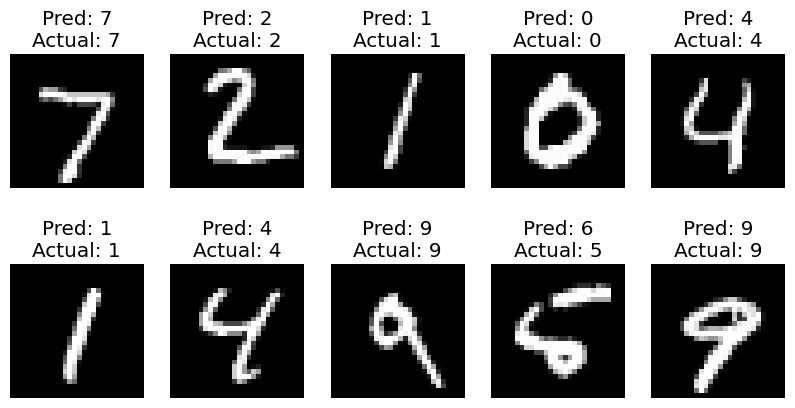

In [37]:
# Set up a 2x5 grid to display the images
plt.figure(figsize=(10, 5))
for i in range(10):
    # Create a subplot
    plt.subplot(2, 5, i + 1)
    
    # Display the test image
    plt.imshow(x_test[i], cmap='gray')
    
    # Set the title with the prediction and the actual label
    plt.title(f"Pred: {predicted_labels[i]}\nActual: {actual_labels[i]}")
    
    # Hide the axes
    plt.axis('off')


--- Predicting a random image from test set ---


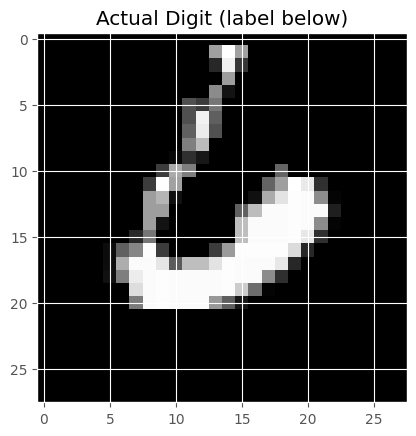

Actual Label: 6
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step
The Predicted class is : 6


In [38]:
# 8. Random Prediction

print("\n--- Predicting a random image from test set ---")

# rename testX to x_test (your variable)
testX = x_test  

# pick a random image index
n = random.randint(0, testX.shape[0] - 1)

plt.imshow(testX[n].reshape(28, 28), cmap='gray')
plt.title("Actual Digit (label below)")
plt.show()

print("Actual Label:", y_test[n])

predicted_value = model.predict(testX)
print(f"The Predicted class is : {np.argmax(predicted_value[n])}")